In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


AxesSubplot(0.125,0.125;0.775x0.755)


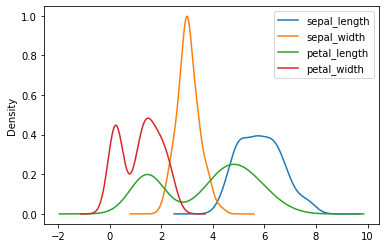

In [19]:
print(df.plot(kind='kde'))

In [24]:
df.iloc[:,4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
df['species'] = df['species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [26]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3
149,5.9,3.0,5.1,1.8,3


In [47]:
X = df.iloc[:,[0,3]].values #taking sepal_length and petal_width only to keep the dimension lesser and for visualization purpose
Y = df.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(X,Y,test_size = .2,random_state = 42)

# Model building

In [49]:
from sklearn.svm import SVC

In [50]:
svm_clf = SVC(kernel = 'poly',degree=5,random_state=42)
svm_clf.fit(x_train,y_train)

SVC(degree=5, kernel='poly', random_state=42)

# prediction

In [51]:
y_pred = svm_clf.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [53]:
score = accuracy_score(y_test, y_pred)
print(score)

1.0


In [54]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [55]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Visualizing the result

In [56]:
# Define Grid for Visualization

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# you encountered the error because svm.predict expects a numpy array-like input, and if you directly pass a DataFrame, you'll get a TypeError. Using df.values or np.c_ as shown above converts the DataFrame to a numpy array, which can be used as input to the predict method without errors.

In [57]:
# Make Predictions on Mesh Grid

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

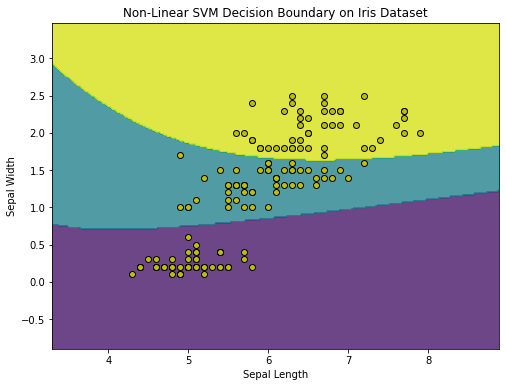

In [59]:
# Plot Decision Boundary and Data Points

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c='y', edgecolors='k', marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Non-Linear SVM Decision Boundary on Iris Dataset')
plt.show()